In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

In [34]:
data = pd.read_csv("standardized.csv")

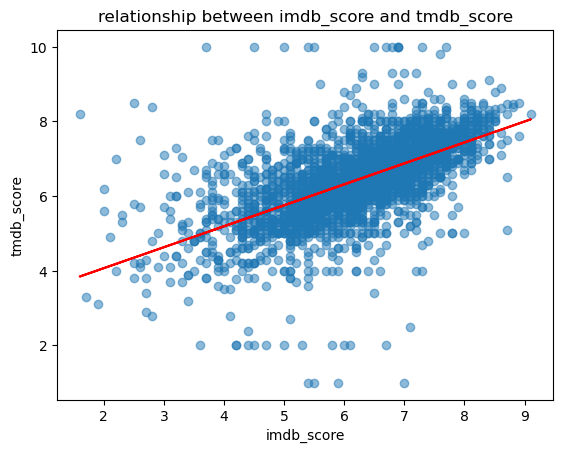

In [35]:
# plot the relationship between two scores
data_draw = data.dropna(subset = ["imdb_score", "tmdb_score"])
x = data_draw["imdb_score"]
y = data_draw["tmdb_score"]

plt.scatter(x, y, alpha = 0.5)
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel("imdb_score")
plt.title("relationship between imdb_score and tmdb_score")
plt.ylabel("tmdb_score")
plt.plot(x, slope * x + intercept, color='red', label='Line of Best Fit')
plt.show()

In [36]:
def regression(missingValue, predictedValue, file):
    data = pd.read_csv(file)
    # find the data that only miss one value
    missing_data = data[data[missingValue].isnull() & data[predictedValue].notnull()]

    # extract the non-missing data and randomly select 20% data to test and 80% data to train the model
    non_missing_data = data.dropna(subset = [missingValue, predictedValue])
    train_data, test_data = train_test_split(non_missing_data, test_size = 0.2, random_state = 42)

    x_train = train_data[missingValue].values.reshape(-1,1)
    y_train = train_data[predictedValue].values.reshape(-1,1)

    linear_model = LinearRegression()
    linear_model.fit(y_train, x_train)

    # test the mean squared error of the model
    x_test = test_data[missingValue].values.reshape(-1,1)
    y_test = test_data[predictedValue].values.reshape(-1,1)

    predicted_test = linear_model.predict(y_test)
    mse = mean_squared_error(x_test, predicted_test)
    print("Mean Squared Error on Test Data: ", mse)

    # use the linear regression model to fill in missing value
    predicted = linear_model.predict(missing_data[[predictedValue]])
    data.loc[missing_data.index, missingValue] = predicted

    # plot the graph of actual value and predicted value
    plt.scatter(x_test, y_test, alpha = 0.5)
    plt.plot(predicted_test, y_test, color = "red")
    plt.xlabel("missing value")
    plt.ylabel("predicted value")
    plt.title("Actual value vs Predicted value")
    plt.show()
    data[missingValue] = data[missingValue].round(1)
    data.to_csv("score_preprocessing.csv", index = False)

Mean Squared Error on Test Data:  0.8348354343865987


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


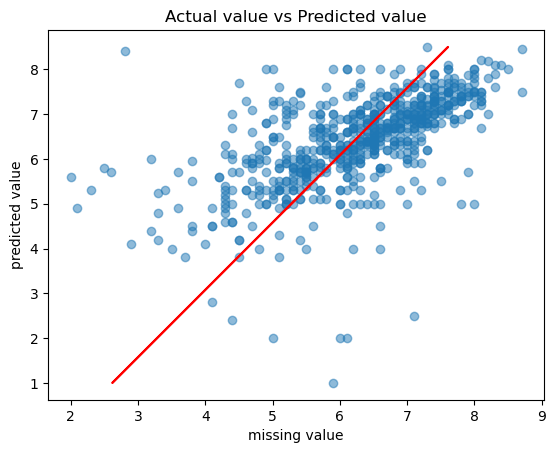

Mean Squared Error on Test Data:  0.6086574190173132


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


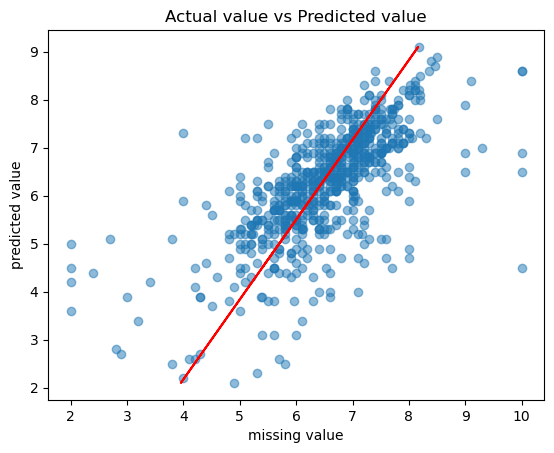

In [37]:

regression("imdb_score", "tmdb_score", "standardized.csv")
regression("tmdb_score", "imdb_score", "score_preprocessing.csv")

In [38]:
data = pd.read_csv("score_preprocessing.csv")

# fill in the remianing missing value that miss both "imdb_score" and "tmdb_score"
mean_imputer = SimpleImputer(missing_values= np.nan, strategy = "mean")
data["imdb_score"] = np.round(mean_imputer.fit_transform(data[["imdb_score"]]), 1)
data["tmdb_score"]= np.round(mean_imputer.fit_transform(data[["tmdb_score"]]), 1)

# assign 0.5 weight to imdb_score and tmdb_score to generage an average score column
data["avarage_score"] = 0.5 * data["imdb_score"] + 0.5 * data["tmdb_score"]
data["avarage_score"] = data["avarage_score"].round(1)
data.to_csv("score_preprocessing.csv", index = False)

data = pd.read_csv("score_preprocessing.csv")
data[["avarage_score", "weighted_average_popularity"]].to_csv("score.csv", index = False)

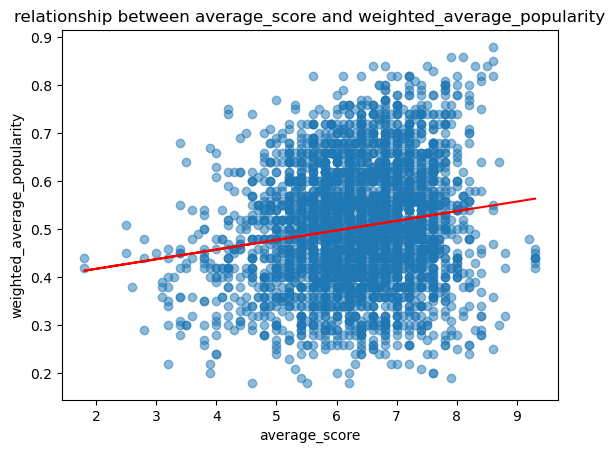

,weighted_average_popularity,avarage_score
weighted_average_popularity,1.00000,0.16098
avarage_score,0.16098,1.00000


In [39]:
data = pd.read_csv("score.csv")

# plot the graph of relationship between average_score and weighted_average_popularity
x = data["avarage_score"]
y = data["weighted_average_popularity"]
plt.scatter(x, y, alpha = 0.5)
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel("average_score")
plt.ylabel("weighted_average_popularity")
plt.title("relationship between average_score and weighted_average_popularity")
plt.plot(x, slope * x + intercept, color='red', label='Line of Best Fit')
plt.show()

# calculate the correlation
Features = ['weighted_average_popularity', 'avarage_score']
data[Features].corr(method='pearson')

In [40]:

data = pd.read_csv("score.csv")

# calculate the mutual information
x = data[["avarage_score"]]
y = data["weighted_average_popularity"]

mi = mutual_info_regression(x, y)
print(mi)

[0.0439421]


The data for mutual information is quite low, so the correlation between scores and likability is small